In [93]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

In [6]:
FILE_PATH = '../../data/stability_paper_data/full_features.xlsx'

In [11]:
composition_df = pd.read_excel(FILE_PATH, sheet_name='DFT Calculated Dataset')

In [75]:
A_SITE_COLUMNS = [
    'A site #1',
    'A site #2',
    'A site #3',
]

B_SITE_COLUMNS = [
    'B site #1',
    'B site #2',
    'B site #3',
]

TARGET_COLUMN = 'energy_above_hull (meV/atom)'

In [76]:
a1_mask = composition_df[A_SITE_COLUMNS].isna().sum(axis=1) == 2
b1_mask = composition_df[B_SITE_COLUMNS].isna().sum(axis=1) == 2

In [77]:
a1_df = composition_df[a1_mask].copy()
b1_df = composition_df[b1_mask].copy()

In [126]:
top_asite_compounds = a1_df['A site #1'].value_counts().head(5).index.values
sub_df_a = a1_df[a1_df['A site #1'].isin(top_asite_compounds)]

top_bsite_compounds = b1_df['B site #1'].value_counts().head(9).index.values
sub_df_b = b1_df[b1_df['B site #1'].isin(top_bsite_compounds)]

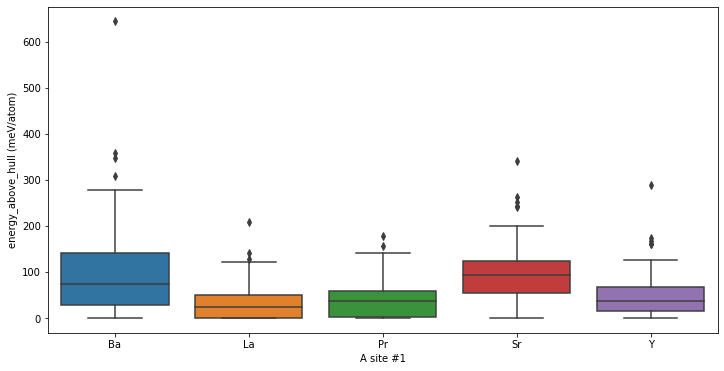

In [127]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=sub_df_a, 
            x='A site #1', 
            y='energy_above_hull (meV/atom)',
            ax=ax)

plt.show()

In [128]:
sub_df_a.groupby('A site #1')[TARGET_COLUMN].std().to_frame('stdev').round(1)

,stdev
A site #1,
Ba,90.9
La,39.8
Pr,38.6
Sr,63.6
Y,43.8


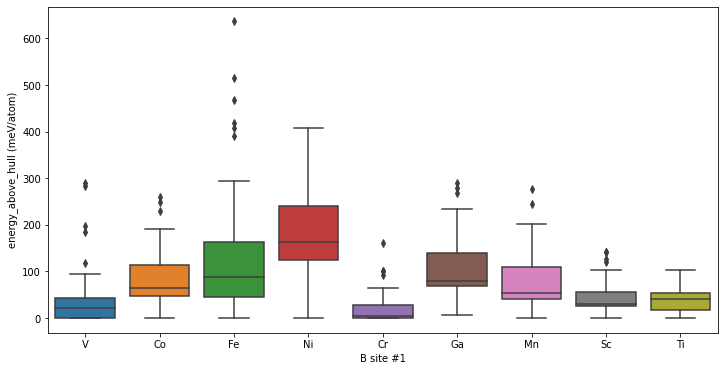

In [129]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data=sub_df_b, 
            x='B site #1', 
            y='energy_above_hull (meV/atom)',
            ax=ax)

plt.show()

In [130]:
sub_df_b.groupby('B site #1')[TARGET_COLUMN].std().to_frame('stdev').round(1)

,stdev
B site #1,
Co,57.6
Cr,33.7
Fe,112.2
Ga,70.4
Mn,55.0
Ni,97.7
Sc,37.8
Ti,24.4
V,53.9


In [131]:
f_stat_result = []

for compound in top_asite_compounds:
    group1 = sub_df_a[sub_df_a['A site #1'] == compound][TARGET_COLUMN].values
    group2 = sub_df_a[sub_df_a['A site #1'] != compound][TARGET_COLUMN].values
    
    anova_result = stats.f_oneway(group1, group2)
    
    f_stat_result.append({'compound': compound, 'pval': anova_result.pvalue})
    
f_stat_df = pd.DataFrame(f_stat_result).sort_values('pval')

In [132]:
f_stat_df

,compound,pval
0,Ba,1.831344e-15
3,La,6.798916e-10
4,Sr,1.169944e-09
1,Pr,1.385961e-05
2,Y,7.971185e-04


In [133]:
f_stat_result = []

for compound in top_bsite_compounds:
    group1 = sub_df_b[sub_df_b['B site #1'] == compound][TARGET_COLUMN].values
    group2 = sub_df_b[sub_df_b['B site #1'] != compound][TARGET_COLUMN].values
    
    anova_result = stats.f_oneway(group1, group2)
    
    f_stat_result.append({'compound': compound, 'pval': anova_result.pvalue})
    
f_stat_df = pd.DataFrame(f_stat_result).sort_values('pval')

In [134]:
f_stat_df

,compound,pval
3,Ni,6.231504e-26
1,V,2.357018e-08
7,Cr,3.769818e-08
0,Fe,6.178170e-07
6,Ti,5.119251e-05
8,Sc,4.658892e-04
5,Ga,8.060633e-02
2,Mn,3.090564e-01
4,Co,8.375004e-01
